<p style="color: darkviolet; font-size:30px; font-weight : bold; text-align:center;">
 Mini Project 2– Python Libraries
 </p>

<p style="color:maroon; font-size:32px; font-weight:bold;">
Project - Student Performance and Attendance Analysis
</p>


<p style="color:green ; font-size: 25px; font-weight :bold;">Analyse student performance and attendance using attached excel file which has 2 tabs in the document</p>  

In [221]:
pwd

'C:\\Anitha_official\\DataScience_IITG\\0_Assignments_and_Projects\\Projects\\Numpy_Pandas'

<p style="color:hotpink ; font-size:20px; font-weight:bold">
1. Load the student marks and attendance data from the provided Excel files into two separate Pandas Data Frames
</p>

In [222]:
import pandas as pd
import numpy as np

# read from Marks and attendence sheets from excel file to dataframe 

marks_df = pd.read_excel("Student_Performance_Analysis.xlsx",sheet_name = "Marks")
attendance_df = pd.read_excel("Student_Performance_Analysis.xlsx",sheet_name = "Attendance")

# replace the spaces with underscore in column names

marks_df.columns = marks_df.columns.str.replace(" ","_")
attendance_df.columns = attendance_df.columns.str.replace(" ","_")

<p style="color:hotpink ; font-size:20px; font-weight:bold">
2.	Merge the two Data Frames on the Name column to create a single DataFrame.</p>

In [223]:
# view the datasets and its dimensions
marks_df.head()
attendance_df.head()
marks_df.shape
attendance_df.shape

# merge two datasets using inner join with the key variable Name
merge_df = pd.merge(marks_df,attendance_df, how="inner",on="Name")
merge_df.head()
merge_df.shape

(110, 10)

<p style="color:hotpink ; font-size:20px; font-weight:bold">
3.	Replace attendance values ('Y' or 'N') with numeric values (1 for 'Y' and 0 for 'N').</p>

In [224]:
# make a copy of merge_df dataframe
df = merge_df.copy()

# Replace those column names starts with Attendance will replace with 1 for 'Y' and 0 for 'N'
for col in df.columns:
    if col.startswith("Attendance"):
        df[col] = df[col].replace({'Y': 1, 'N': 0})
df.head()
df.to_csv("merge_file.csv") # export/write dataframe as csv to local folder


C:\Users\anith\AppData\Local\Temp\ipykernel_10876\1633800006.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'Y': 1, 'N': 0})


<p style="color:hotpink ; font-size:20px; font-weight:bold">
4.	Deal with the missing values </p>

In [225]:
df.info() # view the data types and missing value metrics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              110 non-null    object 
 1   Mini_Test_1       109 non-null    object 
 2   Mini_Test_2       109 non-null    object 
 3   Live_Test         109 non-null    object 
 4   Assignment        109 non-null    float64
 5   Attendance_Day_1  110 non-null    int64  
 6   Attendance_Day_2  110 non-null    int64  
 7   Attendance_Day_3  110 non-null    int64  
 8   Attendance_Day_4  110 non-null    int64  
 9   Attendance_Day_5  110 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 8.7+ KB


In [226]:
# convert the object type to numeric data type
df['Mini_Test_1'] = pd.to_numeric(df['Mini_Test_1'], errors='coerce')
df['Mini_Test_2'] = pd.to_numeric(df['Mini_Test_2'], errors='coerce')
df['Live_Test']   = pd.to_numeric(df['Live_Test'], errors='coerce')

# store the missing value records if any 
df_null = df[df.isnull().any(axis = 1)]

# retained dataset
clean_df = df.dropna()
clean_df.to_csv("clean_records.csv", index=False)
df_null.to_csv("df_null.csv", index=False)
df_null.shape

(11, 10)

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              110 non-null    object 
 1   Mini_Test_1       103 non-null    float64
 2   Mini_Test_2       106 non-null    float64
 3   Live_Test         107 non-null    float64
 4   Assignment        109 non-null    float64
 5   Attendance_Day_1  110 non-null    int64  
 6   Attendance_Day_2  110 non-null    int64  
 7   Attendance_Day_3  110 non-null    int64  
 8   Attendance_Day_4  110 non-null    int64  
 9   Attendance_Day_5  110 non-null    int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 8.7+ KB


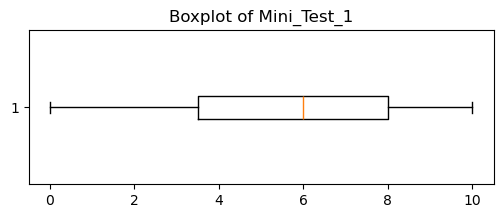

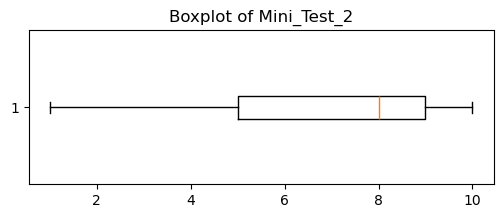

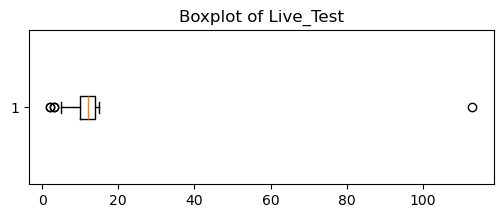

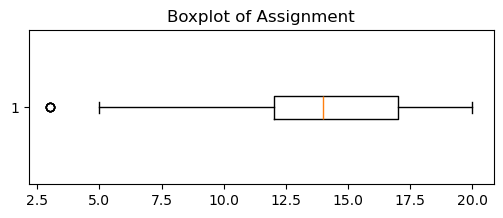

In [228]:
import matplotlib.pyplot as plt
cols = ["Mini_Test_1", "Mini_Test_2","Live_Test","Assignment"]  # example

for col in cols:
    plt.figure(figsize=(6, 2))
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(f"Boxplot of {col}")
    plt.show()

In [229]:
# Identify Outliers and replace with Boundary Values (Capping)

import numpy as np

Q1 = df["Live_Test"].quantile(0.25)
Q3 = df["Live_Test"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df["Live_Test"] < lower) | (df["Live_Test"] > upper)]
outliers

# Removing outliers from the data
'''
df_no_outliers = df[
    (df['Live_Test'] >= Q1 - 1.5 * IQR) &
    (df['Live_Test'] <= Q3 + 1.5 * IQR)
]
'''

# Replace outliers with capping
'''
df["Live_Test"] = np.where(df["Live_Test"] < lower, lower,
            np.where(df["Live_Test"] > upper, upper, df["Live_Test"]))
df.describe()
df.info()
'''

# replacing the outliers with median

median = df['Live_Test'].median()

df.loc[df['Live_Test'] > upper, 'Live_Test'] = median
df.loc[df['Live_Test'] < lower, 'Live_Test'] = median


In [230]:
# fill NaN with mean for numeric columns
#df = df_no_outliers.copy()

df = df.fillna(df.mean(numeric_only=True))
df.describe()

,Mini_Test_1,Mini_Test_2,Live_Test,Assignment,Attendance_Day_1,Attendance_Day_2,Attendance_Day_3,Attendance_Day_4,Attendance_Day_5
count,110.000000,110.000000,110.000000,110.000000,110.00000,110.000000,110.000000,110.000000,110.000000
mean,5.961165,6.943396,11.766355,14.009174,0.40000,0.418182,0.427273,0.572727,0.545455
std,2.876422,2.782086,2.466582,3.820503,0.49214,0.495518,0.496946,0.496946,0.500208
min,0.000000,1.000000,5.000000,3.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,5.000000,10.000000,12.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,8.000000,12.000000,14.000000,0.00000,0.000000,0.000000,1.000000,1.000000
75%,8.000000,9.000000,14.000000,17.000000,1.00000,1.000000,1.000000,1.000000,1.000000
max,10.000000,10.000000,15.000000,20.000000,1.00000,1.000000,1.000000,1.000000,1.000000


<p style="color:hotpink ; font-size:20px; font-weight:bold">
5.	Do the column cleaning like name column is the combination of upper and lower case.</p>

In [231]:
df['Name'] = df['Name'].str.title()

 <p style="color:steelblue ; font-size:20px; font-weight:bold">
Data Transformation
</p>

<div style="color:mediumslateblue; font-size:15px; font-weight:bold;">

<ol>
  <li>Create separate columns for below:</li>
  <ul>
    <li>Total marks for each student.</li>
    <li>Percentage marks for each student.</li>
    <li>Attendance percentage for each student based on attendance columns.</li>
    <li>Calculate the weighted percentage – Attendance(40%), Mini test01(10%), Mini test02(10%), Live test(20%), Assignment (20%).</li>
    <li>Use this weighted percentage for further calculations.</li>
  </ul>
</ol>

</div>


<p style="color: hotpink ; font-size:20px; font-weight:bold">
Total marks for each student
</p>  

In [232]:
#df = df_no_outliers.copy()
mark_cols = ["Mini_Test_1", "Mini_Test_2","Live_Test","Assignment"]
df["Total_Marks_per_student"] = df[mark_cols].sum(axis=1)

# check the created column
df.columns
df.describe()

,Mini_Test_1,Mini_Test_2,Live_Test,Assignment,Attendance_Day_1,Attendance_Day_2,Attendance_Day_3,Attendance_Day_4,Attendance_Day_5,Total_Marks_per_student
count,110.000000,110.000000,110.000000,110.000000,110.00000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,5.961165,6.943396,11.766355,14.009174,0.40000,0.418182,0.427273,0.572727,0.545455,38.680091
std,2.876422,2.782086,2.466582,3.820503,0.49214,0.495518,0.496946,0.496946,0.500208,6.684551
min,0.000000,1.000000,5.000000,3.000000,0.00000,0.000000,0.000000,0.000000,0.000000,23.000000
25%,4.000000,5.000000,10.000000,12.000000,0.00000,0.000000,0.000000,0.000000,0.000000,34.250000
50%,6.000000,8.000000,12.000000,14.000000,0.00000,0.000000,0.000000,1.000000,1.000000,38.820628
75%,8.000000,9.000000,14.000000,17.000000,1.00000,1.000000,1.000000,1.000000,1.000000,44.000000
max,10.000000,10.000000,15.000000,20.000000,1.00000,1.000000,1.000000,1.000000,1.000000,55.000000


<p style="color: hotpink ; font-size:20px; font-weight:bold">
Percentage marks for each student
</p> 

In [233]:
#df["Total_Marks_per_student"]=df["Mini_Test_1"]+df["Mini_Test_2"]+df["Live_Test"]+df["Assignment"]
total = df.describe().loc["max"]["Mini_Test_1"]+df.describe().loc["max"]["Mini_Test_2"]+df.describe().loc["max"]["Live_Test"]+df.describe().loc["max"]["Assignment"]
df["Marks_percentage"] = round((df["Total_Marks_per_student"]/total)*100,2)
#df["Marks_percentage"] = df["Marks_percentage"].astype("str")+"%"

<p style="color: hotpink ; font-size:20px; font-weight:bold">
Attendance percentage for each student based on attendance columns.
</p> 

In [234]:
Attendance_cols=["Attendance_Day_1","Attendance_Day_2","Attendance_Day_3","Attendance_Day_4","Attendance_Day_5"]
df["Attendance_Percentage"] = (df[Attendance_cols].sum(axis=1) / 5)*100
#df["Attendance_Percentage"]=df["Attendance_Percentage"].astype("str")+"%"

In [235]:
df["Mini1_Percent"] = df["Mini_Test_1"] / 10 * 100
df["Mini2_Percent"] = df["Mini_Test_2"] / 10 * 100
df["Live_Percent"]   = df["Live_Test"] / 20 * 100
df["Assign_Percent"] = df["Assignment"] / 20 * 100

<p style="color: hotpink ; font-size:20px; font-weight:bold">
Calculate the weighted percentage – Attendance(40%), Mini test01(10%), Mini test02(10%), Live test(20%), Assignment (20%).
</p>

In [236]:
df["Weighted_Percentage"] = (
      df["Attendance_Percentage"] * 0.40
    + df["Mini1_Percent"]        * 0.10
    + df["Mini2_Percent"]        * 0.10
    + df["Live_Percent"]         * 0.20
    + df["Assign_Percent"]       * 0.20
)
#df["Weighted_Percentage"]=round(df["Weighted_Percentage"],0).astype(int)
df["Weighted_Percentage"]=round(df["Weighted_Percentage"],0)
df["Weighted_Percentage"].dtype

dtype('float64')

<div style="color:mediumslateblue; font-size:15px; font-weight:bold;">

<ol start="2">
      <li> Classify each student's performance into categories::</li>
  <ul>
    <li>"Excellent" for percentages ≥ 85..</li>
    <li>Percentage marks for each student.</li>
    <li>"Good" for percentages between 71 and 84.</li>
    <li>"Average" for percentages between 50 and 70.</li>
    <li>Needs Improvement" for percentages < 50.</li>
  </ul>
</ol>

</div>

In [237]:
conditions = [
    df["Weighted_Percentage"] >= 85,
    df["Weighted_Percentage"].between(71,84),
    df["Weighted_Percentage"].between(50,70),
    df["Weighted_Percentage"] <50
]
choices = ["Excellent", "Good", "Average", "Needs Improvement"]
df["Performance_Categories"] = np.select(conditions,choices ,default="Needs Improvement")

In [238]:
df.to_csv("df.csv")

In [239]:
df["Performance_Categories"].value_counts()

Performance_Categories
Average              75
Needs Improvement    22
Good                 12
Excellent             1
Name: count, dtype: int64

<p style="color:steelblue ; font-size:20px; font-weight:bold">
Analysis
</p>


<p style="color: hotpink ; font-size:20px; font-weight:bold">
1. Identify students with attendance below 75% but weighted percentage >50%.
</p>

In [240]:
filtered_df = df[(df["Attendance_Percentage"] < 75) & 
                 (df["Weighted_Percentage"] > 50)]

filtered_df.shape

(71, 19)

<p style="color: hotpink ; font-size:20px; font-weight:bold">
2.	Highlight the top three students based on percentage marks.
</p>

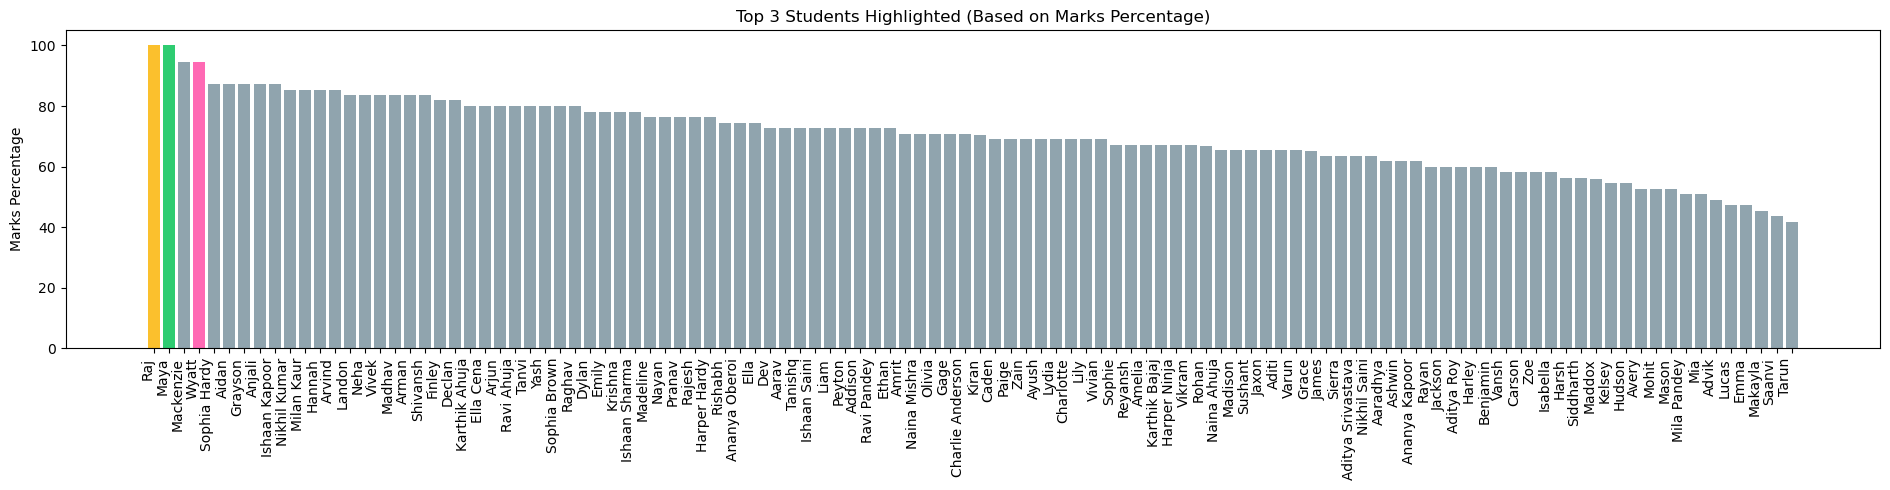

In [241]:
import matplotlib.pyplot as plt

# Identify Top 3 students
top3 = df.nlargest(3, "Marks_percentage")

# Sort full dataframe for visualization
df_sorted = df.sort_values("Marks_percentage", ascending=False)

# Assign colors: gold, silver, bronze for top3
colors = []
for name in df_sorted["Name"]:
    if name == top3.iloc[0]["Name"]:
        colors.append("#FBC02D")
    elif name == top3.iloc[1]["Name"]:
        colors.append("#2ecc71")  #(Bright Peach)
    elif name == top3.iloc[2]["Name"]:
        colors.append("#FF69B4")  # bronze
    else:
        colors.append("#90A4AE")

plt.figure(figsize=(19,5))
plt.bar(df_sorted["Name"], df_sorted["Marks_percentage"], color=colors)
plt.xticks(rotation=90, ha='right')
plt.title("Top 3 Students Highlighted (Based on Marks Percentage)")
plt.ylabel("Marks Percentage")

plt.tight_layout()
plt.show()


<p style="color: hotpink ; font-size:20px; font-weight:bold">
3.	Impact of attendance on Tests/Assignment marks. 
</p>

In [242]:
colss = ["Mini_Test_1","Mini_Test_2","Live_Test","Assignment","Attendance_Percentage"]
df[colss].corr()

,Mini_Test_1,Mini_Test_2,Live_Test,Assignment,Attendance_Percentage
Mini_Test_1,1.000000,-0.015970,0.197032,0.210151,-0.053620
Mini_Test_2,-0.015970,1.000000,0.073697,0.094034,-0.032164
Live_Test,0.197032,0.073697,1.000000,-0.115688,0.020546
Assignment,0.210151,0.094034,-0.115688,1.000000,-0.063732
Attendance_Percentage,-0.053620,-0.032164,0.020546,-0.063732,1.000000


In [243]:
corr = df[colss].corr()["Attendance_Percentage"].sort_values(ascending=False)
corr

Attendance_Percentage    1.000000
Live_Test                0.020546
Mini_Test_2             -0.032164
Mini_Test_1             -0.053620
Assignment              -0.063732
Name: Attendance_Percentage, dtype: float64

<p style="color: darkturquoise ; font-size:20px; font-weight:bold">
Conclusion: Attendance percentage shows a negligible linear correlation with test and assignment scores in this dataset. This suggests that attendance alone is not a strong linear predictor of academic performance. However, non-linear or threshold effects cannot be ruled out without further analysis.

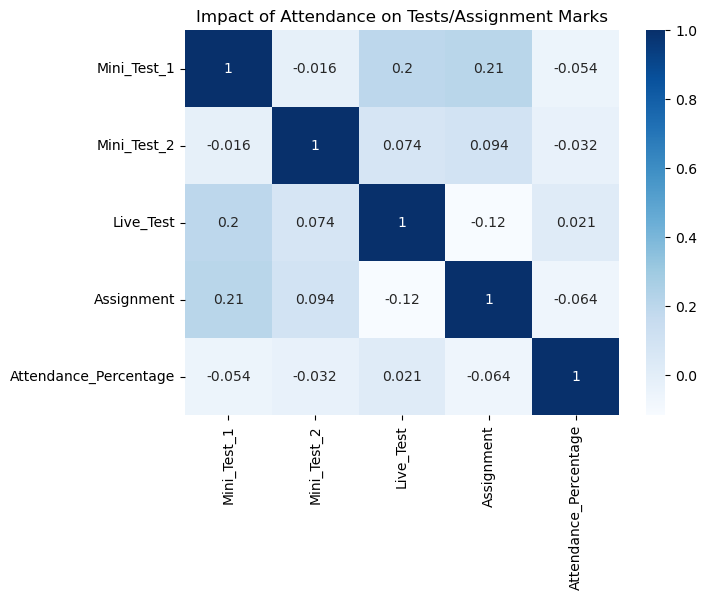

In [244]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.heatmap(df[colss].corr(), annot=True, cmap="Blues")
plt.title("Impact of Attendance on Tests/Assignment Marks")
plt.show()


<p style="color:steelblue ; font-size:20px; font-weight:bold">
Visualisation
</p>


<p style="color: hotpink ; font-size:20px; font-weight:bold">
1.	Create a bar chart displaying weighted percentages for top 5 students
</p>

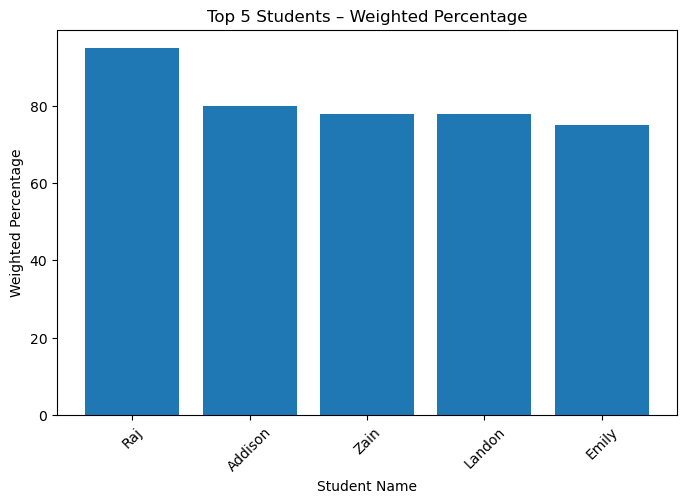

In [245]:
top5 = df.sort_values("Weighted_Percentage", ascending=False).head(5)

plt.figure(figsize=(8,5))
plt.bar(top5["Name"], top5["Weighted_Percentage"])
plt.title("Top 5 Students – Weighted Percentage")
plt.xlabel("Student Name")
plt.ylabel("Weighted Percentage")
plt.xticks(rotation=45)
plt.show()

<p style="color: hotpink ; font-size:20px; font-weight:bold">
2.	Create a pie chart showing the distribution of students across the four performance categories.
</p>


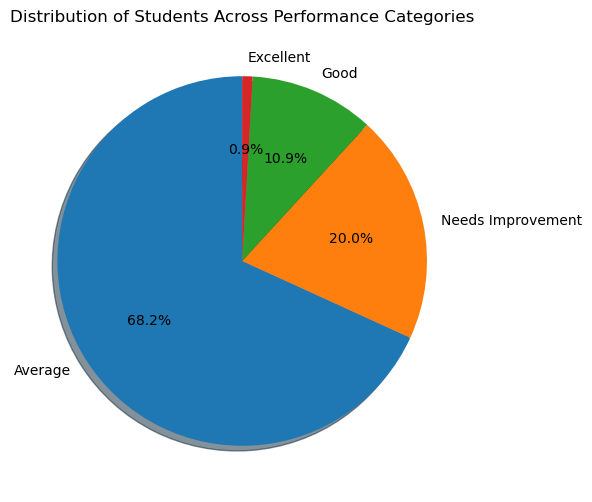

In [246]:
import matplotlib.pyplot as plt

# Count students per category
category_counts = df["Performance_Categories"].value_counts()

# Plot
plt.figure(figsize=(6,6))
plt.pie(
    category_counts,
    labels=category_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    shadow=True
)

plt.title("Distribution of Students Across Performance Categories")
plt.show()


<p style="color: hotpink ; font-size:20px; font-weight:bold">
3.	Create box plots for each test (Live Test, Mini Test 1, Mini Test 2, Assignment) to visualize the spread and detect potential outliers in scores.
</p>

In [247]:
df.describe()

,Mini_Test_1,Mini_Test_2,Live_Test,Assignment,Attendance_Day_1,Attendance_Day_2,Attendance_Day_3,Attendance_Day_4,Attendance_Day_5,Total_Marks_per_student,Marks_percentage,Attendance_Percentage,Mini1_Percent,Mini2_Percent,Live_Percent,Assign_Percent,Weighted_Percentage
count,110.000000,110.000000,110.000000,110.000000,110.00000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,5.961165,6.943396,11.766355,14.009174,0.40000,0.418182,0.427273,0.572727,0.545455,38.680091,70.327273,47.272727,59.611650,69.433962,58.831776,70.045872,57.600000
std,2.876422,2.782086,2.466582,3.820503,0.49214,0.495518,0.496946,0.496946,0.500208,6.684551,12.153816,22.130103,28.764221,27.820862,12.332910,19.102517,10.736374
min,0.000000,1.000000,5.000000,3.000000,0.00000,0.000000,0.000000,0.000000,0.000000,23.000000,41.820000,0.000000,0.000000,10.000000,25.000000,15.000000,29.000000
25%,4.000000,5.000000,10.000000,12.000000,0.00000,0.000000,0.000000,0.000000,0.000000,34.250000,62.275000,40.000000,40.000000,50.000000,50.000000,60.000000,52.000000
50%,6.000000,8.000000,12.000000,14.000000,0.00000,0.000000,0.000000,1.000000,1.000000,38.820628,70.585000,40.000000,60.000000,80.000000,60.000000,70.000000,56.500000
75%,8.000000,9.000000,14.000000,17.000000,1.00000,1.000000,1.000000,1.000000,1.000000,44.000000,80.000000,60.000000,80.000000,90.000000,70.000000,85.000000,64.750000
max,10.000000,10.000000,15.000000,20.000000,1.00000,1.000000,1.000000,1.000000,1.000000,55.000000,100.000000,100.000000,100.000000,100.000000,75.000000,100.000000,95.000000


C:\Users\anith\AppData\Local\Temp\ipykernel_10876\2497710414.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[col] for col in test_cols], labels=test_cols, patch_artist=True)


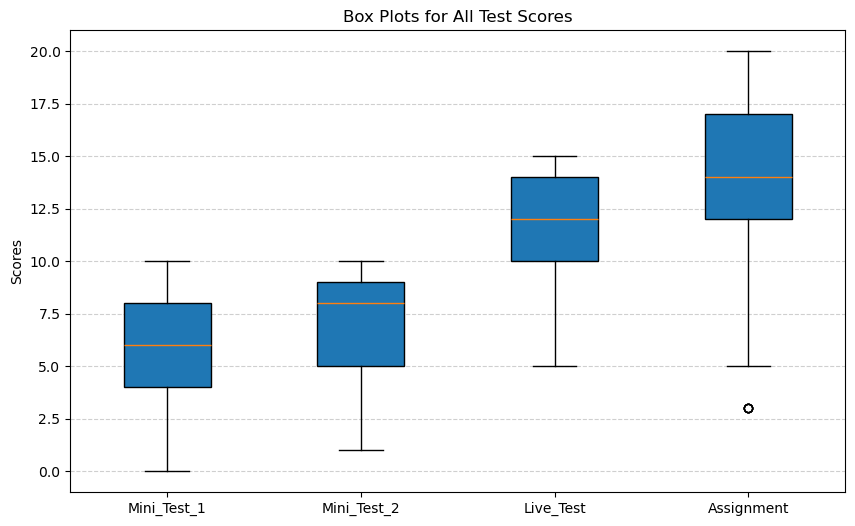

In [248]:
import matplotlib.pyplot as plt

test_cols = ["Mini_Test_1", "Mini_Test_2", "Live_Test", "Assignment"]

plt.figure(figsize=(10,6))

# Create the boxplot
plt.boxplot([df[col] for col in test_cols], labels=test_cols, patch_artist=True)

plt.title("Box Plots for All Test Scores")
plt.ylabel("Scores")
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


<p style="color: hotpink ; font-size:20px; font-weight:bold">
4.	Create a chart to show the students where attendance is less than 50%.

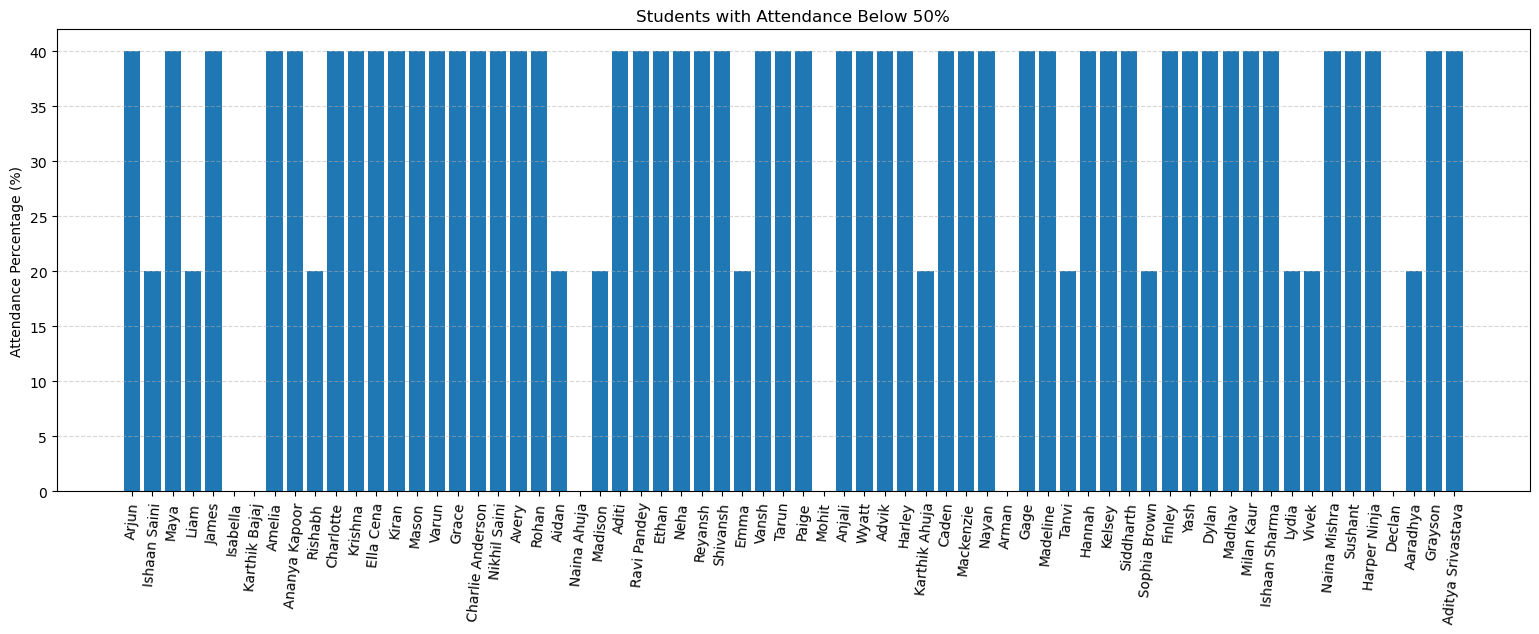

In [249]:
low_attendance = df[df["Attendance_Percentage"] < 51]

import matplotlib.pyplot as plt

plt.figure(figsize=(19,6))

plt.bar(low_attendance["Name"], low_attendance["Attendance_Percentage"])

plt.title("Students with Attendance Below 50%")
plt.ylabel("Attendance Percentage (%)")
plt.xticks(rotation=85)
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()


<p style="color: hotpink ; font-size:20px; font-weight:bold">
Top Additional Insights for Management
</p>

### 1. Correlation Heatmap — Identify what affects performance the most

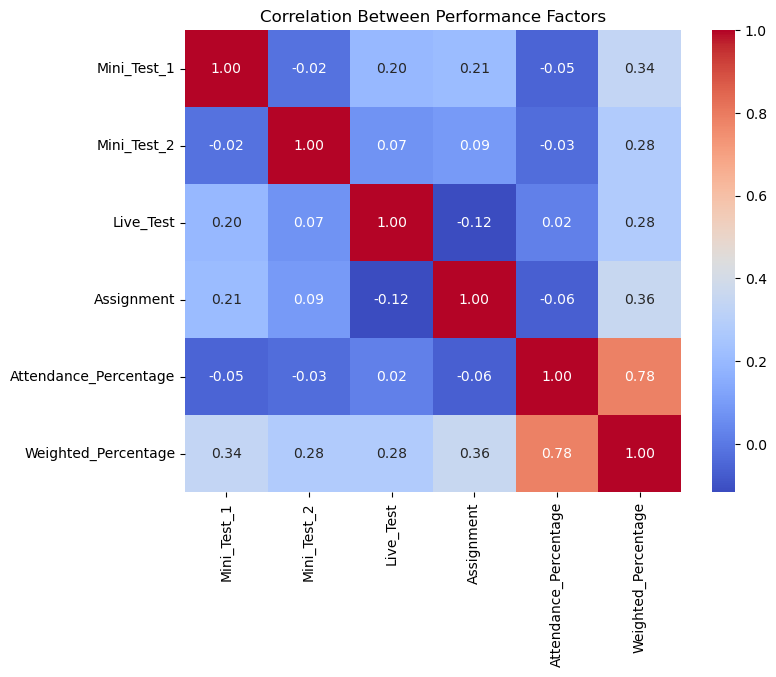

In [258]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ["Mini_Test_1","Mini_Test_2","Live_Test","Assignment",
            "Attendance_Percentage","Weighted_Percentage"]

plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Performance Factors")
plt.show()


### Inference: attendance has low correlation → students may attend but not perform

### 2.Trend Line: Relationship Between Attendance & Weighted Score

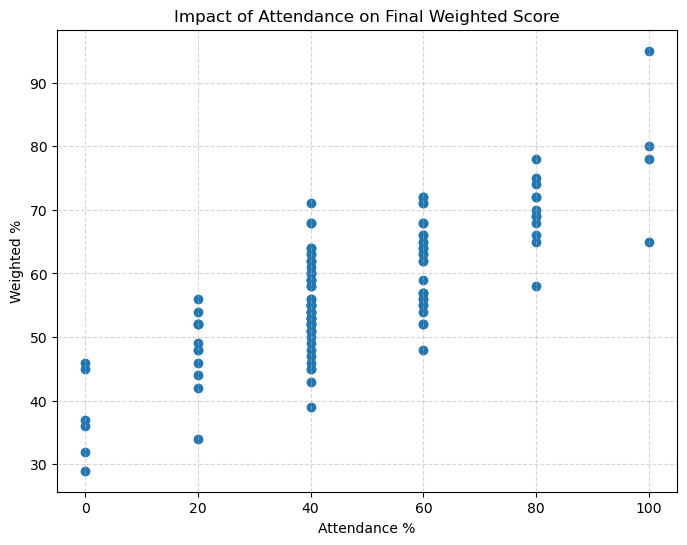

In [259]:
plt.figure(figsize=(8,6))
plt.scatter(df["Attendance_Percentage"], df["Weighted_Percentage"])
plt.title("Impact of Attendance on Final Weighted Score")
plt.xlabel("Attendance %")
plt.ylabel("Weighted %")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


#### Inference: the dots form an upward trend → higher attendance = better score

### 3.Performance Distribution — Understand overall class performance

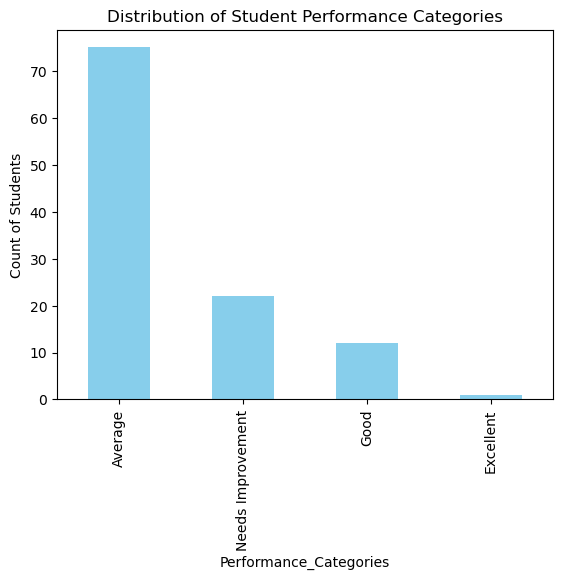

In [260]:
df["Performance_Categories"].value_counts().plot(kind="bar", color="skyblue")

plt.title("Distribution of Student Performance Categories")
plt.ylabel("Count of Students")
plt.show()


### 4. Test-wise Score Comparison — Where students perform well or poorly

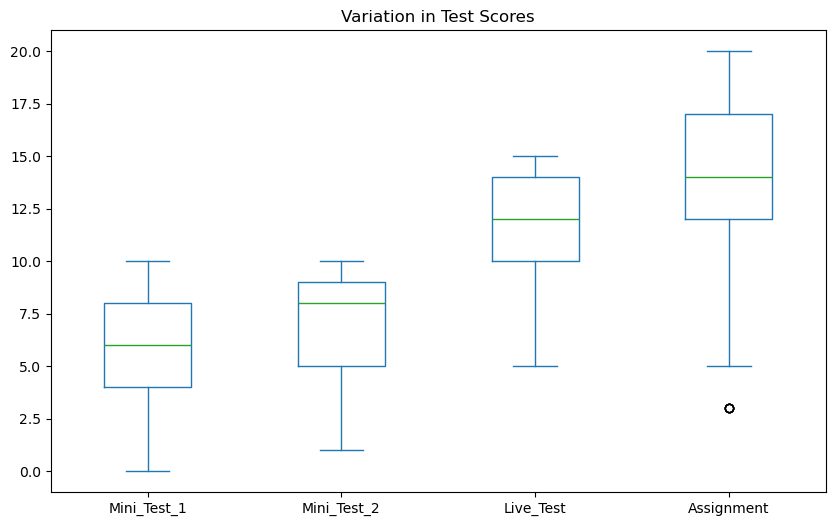

In [261]:
df[["Mini_Test_1","Mini_Test_2","Live_Test","Assignment"]].plot(kind="box", figsize=(10,6))
plt.title("Variation in Test Scores")
plt.show()

### Identify Inconsistent Students (High Marks but Low Attendance)

In [262]:
inconsistent = df[(df["Attendance_Percentage"] < 60) & (df["Marks_percentage"] > 70)]
inconsistent[["Name", "Attendance_Percentage", "Marks_percentage"]]

,Name,Attendance_Percentage,Marks_percentage
0,Arjun,40.0,80.00
4,Ishaan Saini,20.0,72.73
6,Maya,40.0,100.00
7,Liam,20.0,72.73
18,Rishabh,20.0,74.55
20,Krishna,40.0,78.18
21,Ella Cena,40.0,80.00
22,Kiran,40.0,70.33
29,Charlie Anderson,40.0,70.84
39,Aidan,20.0,87.27


#### 6. Compare Top 5 vs Bottom 5 Students

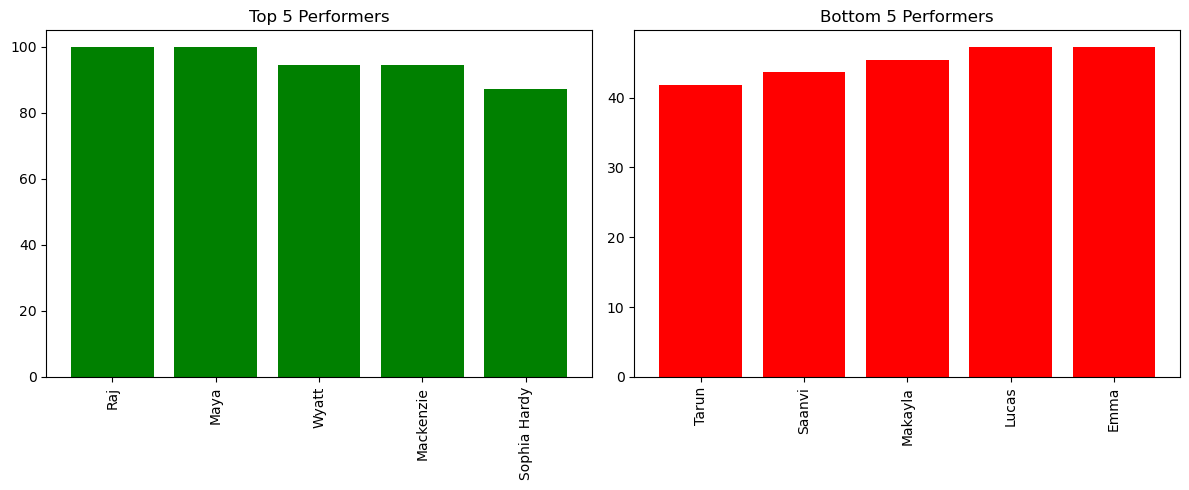

In [263]:
top5 = df.nlargest(5, "Marks_percentage")
bottom5 = df.nsmallest(5, "Marks_percentage")

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.bar(top5["Name"], top5["Marks_percentage"], color="green")
plt.title("Top 5 Performers")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.bar(bottom5["Name"], bottom5["Marks_percentage"], color="red")
plt.title("Bottom 5 Performers")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


### Attendance Trends (Across Days)

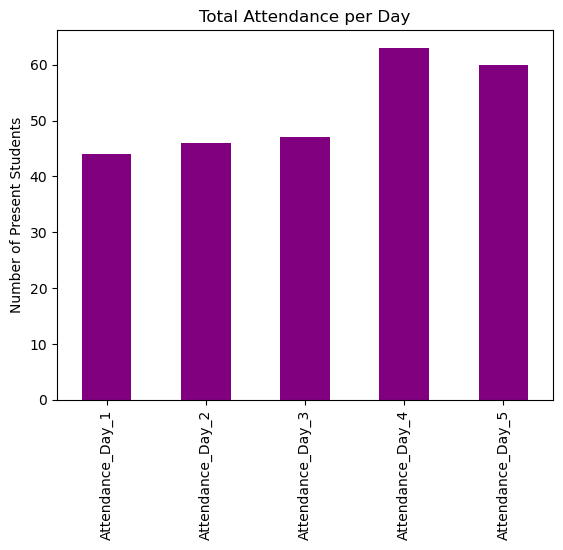

In [264]:
attendance_cols = ["Attendance_Day_1","Attendance_Day_2","Attendance_Day_3",
                   "Attendance_Day_4","Attendance_Day_5"]

df[attendance_cols].sum().plot(kind="bar", color="purple")

plt.title("Total Attendance per Day")
plt.ylabel("Number of Present Students")
plt.show()

### Who Needs Immediate Support? (Risk Zone Students)

In [265]:
risk = df[(df["Attendance_Percentage"] < 60) & (df["Weighted_Percentage"] < 50)]
risk[["Name","Attendance_Percentage","Weighted_Percentage"]]

,Name,Attendance_Percentage,Weighted_Percentage
4,Ishaan Saini,20.0,48.0
7,Liam,20.0,48.0
11,Isabella,0.0,32.0
12,Karthik Bajaj,0.0,37.0
18,Rishabh,20.0,49.0
23,Mason,40.0,45.0
35,Avery,40.0,45.0
40,Naina Ahuja,0.0,36.0
43,Madison,20.0,44.0
53,Emma,20.0,34.0
